In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
# Download the data file that we need to run these examples
import os
outputfilepath='./d0045400.dt3.h5'
if not os.path.exists(outputfilepath):
    import urllib.request
    url='https://data.amisr.com/database/tmp/isr_school_2020/d0045400.dt3.h5'

    print('Downloading data file...')
    urllib.request.urlretrieve(url,outputfilepath)

    print('...Done!')

In [3]:
print(os.path.exists(outputfilepath))

True


In [4]:
#Load an example file
import io_utils #wrapper for pytables routines

#This is one file from a WorldDay35 experiment
f=io_utils.read_whole_h5file(outputfilepath)

In [5]:
#pull out some raw voltage samples

#The f['/Raw11/Raw/Samples']['Data'] array is Nrecords x Npulses x Nranges x 2(IQ)

#range index to pull out
r1=80
r2=r1+1

#number of beams in the experiment (skip these many pulses to pull all the data from the same beam)
nb=11
b=0 #beam index to start on

#voltage samples from one range and one beam
v1=(f['/Raw11/Raw/Samples']['Data'][:,b::nb,r1,0]+1j*f['/Raw11/Raw/Samples']['Data'][:,b::nb,r1,1]).flatten()
v2=(f['/Raw11/Raw/Samples']['Data'][:,b::nb,r2,0]+1j*f['/Raw11/Raw/Samples']['Data'][:,b::nb,r2,1]).flatten()


In [6]:
plt.rcParams['figure.figsize']=6,6
plt.rcParams['font.size']=18

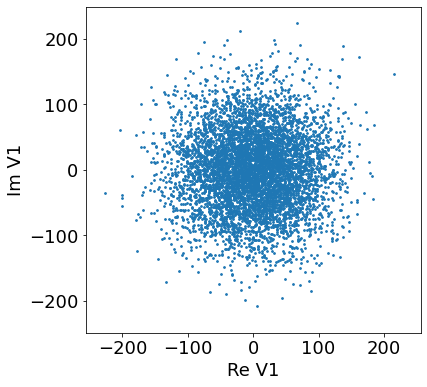

In [7]:
#scatter plot of real and imaginary parts
plt.scatter(v1.real,v1.imag,s=3)
plt.gca().axis('equal')
plt.xlim([-256,256])
plt.ylim([-256,256])
plt.xlabel('Re V1')
plt.ylabel('Im V1')
plt.show()

In [8]:
#Mean and variance
print('Mean: ',numpy.mean(v1))
print('Variance: ',numpy.mean(numpy.abs(v1)**2.0))

Mean:  (-0.9740625-0.9165625j)
Variance:  6936.872


In [9]:
#Covariance between two voltages
print('Complex Covariance: ',numpy.mean(v1*numpy.conj(v2)))
print('Complex Pseudo-Covariance: ',numpy.mean(v1*v2))
print('Re-Re Covariance: ',numpy.mean(v1.real*v2.real))
print('Im-Im Covariance: ',numpy.mean(v1.imag*v2.imag))
print('Re-Im Covariance: ',numpy.mean(v1.real*v2.imag))
print('Im-Re Covariance: ',numpy.mean(v1.imag*v2.real))

Complex Covariance:  (3200.6335+66.33875j)
Complex Pseudo-Covariance:  (-102.36719-30.587187j)
Re-Re Covariance:  1549.1332
Im-Im Covariance:  1651.5004
Re-Im Covariance:  -48.462967
Im-Re Covariance:  17.875782


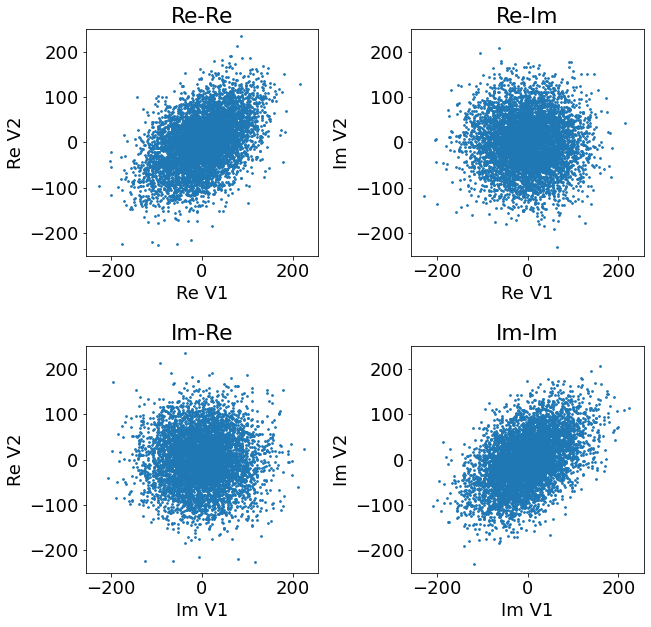

In [10]:
#Scatter Plots of the all the elements
plt.rcParams['figure.figsize']=10,10
fig,axarr=plt.subplots(2,2)
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)

axarr[0,0].scatter(v1.real,v2.real,s=3)
axarr[0,0].axis('equal')
axarr[0,0].set_xlim([-256,256])
axarr[0,0].set_ylim([-256,256])
axarr[0,0].set_xlabel('Re V1')
axarr[0,0].set_ylabel('Re V2')
axarr[0,0].set_title('Re-Re')

axarr[0,1].scatter(v1.real,v2.imag,s=3)
axarr[0,1].axis('equal')
axarr[0,1].set_xlim([-256,256])
axarr[0,1].set_ylim([-256,256])
axarr[0,1].set_xlabel('Re V1')
axarr[0,1].set_ylabel('Im V2')
axarr[0,1].set_title('Re-Im')

axarr[1,0].scatter(v1.imag,v2.real,s=3)
axarr[1,0].axis('equal')
axarr[1,0].set_xlim([-256,256])
axarr[1,0].set_ylim([-256,256])
axarr[1,0].set_xlabel('Im V1')
axarr[1,0].set_ylabel('Re V2')
axarr[1,0].set_title('Im-Re')

axarr[1,1].scatter(v1.imag,v2.imag,s=3)
axarr[1,1].axis('equal')
axarr[1,1].set_xlim([-256,256])
axarr[1,1].set_ylim([-256,256])
axarr[1,1].set_xlabel('Im V1')
axarr[1,1].set_ylabel('Im V2')
axarr[1,1].set_title('Im-Im')

plt.show()

## Exercises

1. Create a new voltage that is $90^\circ$ in phase ahead of $v_2$. Define $v_3 = e^{j\pi/2}v_2$. Recompute the covariances and scatter plots between $v_1$ and $v_3$. How do these look different from the comparisons between $v_1$ and $v_2$?

2. Create a new voltage that is $90^\circ$ in phase behind of $v_2$. Define $v_4 = e^{-j\pi/2}v_2$. Recompute the covariances and scatter plots between $v_1$ and $v_4$. How do these look different from the comparisons between $v_1$ and $v_2$?

3. Create a new voltage that is $45^\circ$ in phase ahead of $v_2$. Define $v_5 = e^{j\pi/4}v_2$. Recompute the covariances and scatter plots between $v_1$ and $v_4$. How do these look different from the comparisons between $v_1$ and $v_2$?